# 准备数据集



In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!unzip /gdrive/My\ Drive/Colab\ Notebooks/datasets/jb084sr9005_ct_statewide_2019_02_25.csv.zip

Archive:  /gdrive/My Drive/Colab Notebooks/datasets/jb084sr9005_ct_statewide_2019_02_25.csv.zip
  inflating: share/data/opp-for-archive/ct_statewide_2019_02_25.csv  


In [0]:
config = {
    'data_file': './share/data/opp-for-archive/ct_statewide_2019_02_25.csv',
}

# Introduction

做了一场 tianchi 的比赛，发现自己当前的思维方式主要是 SQL 模式，无法自由切换至 pandas 模式，浪费了不少时间，决定刻意练习一下

In [0]:
import numpy as np
import pandas as pd

# Series

虽然 pandas 的官方文档中称 Series 为 1维同数据类型的数组，但我感觉 Series 更像是仅有一列的 DataFrame。





## 主要属性


* index：每一行有个唯一 id，index 是行 id 的集合
* name：列名
* values：底层的 ndarray，详见 [values、get_values() 与 array、to_numpy()](#scrollTo=HbGzBPre-sOL)

来自 ndarray 的属性：

* ndim：对于 Series 来说，永远为 1
* shape：对于 Series 来说，永远为 (n, )，n 为数组中的元素数
* dtype：列数据类型

In [0]:
s = pd.Series(data = [1, 3, 5, 7], name = 'column_name_1')

In [6]:
print('name:', s.name)
print('index:', s.index)
print('dtype:', s.dtype)
print('values:', s.values)
print('ndim:', s.ndim)
print('shape:', s.shape)
print('=== s ===')
print(s)

name: column_name_1
index: RangeIndex(start=0, stop=4, step=1)
dtype: int64
values: [1 3 5 7]
ndim: 1
shape: (4,)
=== s ===
0    1
1    3
2    5
3    7
Name: column_name_1, dtype: int64


## 知识点：dtype

dtype 本身是一个 class，其 instance 用以描述数据类型，numpy 根据 dtype 决定内存中的数据如何解释，包括但不限于：

* 数据类型（整数、浮点数、Python object 等）
* 数据大小（占用多少字节）
* 字节序（大端 or 小端）
* ...

numpy 预定义了 [24 个 dtype](https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html#arrays-scalars-built-in)，涵盖了常见的数据类型，如：np.int8，np.float16 等

除此之外，还可以通过字符串构造 dtype，如 'uint8' 等同于 np.uint8

除了 numpy 内置的数据类型外，[pandas 还扩展了 numpy 的类型系统](http://pandas.pydata.org/pandas-docs/stable/reference/arrays.html)，引入了 7 种新的 dtype：

* TZ-aware datetime：知道时区的 datetime 类型
* Timedelta：时间差类型
* Period：周期类型（如：每周一5点）
* Interval：区间类型（左开右闭区间等）
* Nullable Integer：
* Categorical：类似于其他语言的枚举值，超出枚举范围的值为 np.nan
* Sparse

## 坑：Immutability——产生新对象，不改变旧对象

### Data Structure

The best way to think about the pandas data structures is as flexible containers for lower dimensional data. For example, DataFrame is a container for Series, and Series is a container for scalars. We would like to be able to insert and remove objects from these containers in a dictionary-like fashion.

理解 pandas 数据结构的最好方式是将其想象成容纳低维数据的容器

* DataFrame 是 Series 的容器
* Series 是标量数据的容器

---

### Mutability and copying of data 

All pandas data structures are value-mutable (the values they contain can be altered) but not always size-mutable. The length of a Series cannot be changed, but, for example, columns can be inserted into a DataFrame. However, the vast majority of methods **produce new objects and leave the input data untouched**. In general we like to **favor immutability** where sensible.

容器包含的内容可以改变，但容器的大小并不总是可以改变。比如，Series 的长度不可改变，但是 DataFrame 却可以增减列。

大量 pandas 方法产生新对象，而不改变旧对象。

In [7]:
s.astype(np.int8)
print('astype 并不改变原 Series，而是返回一个新的 Series')
print('原 Series：')
print(s)
print('所以一定要记得赋值，赋值后的 Series:')
s = s.astype(np.int8)
print(s)


astype 并不改变原 Series，而是返回一个新的 Series
原 Series：
0    1
1    3
2    5
3    7
Name: column_name_1, dtype: int64
所以一定要记得赋值，赋值后的 Series:
0    1
1    3
2    5
3    7
Name: column_name_1, dtype: int8


## 坑：[Series.reset_index()](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reset_index.html)

**CAUTION：Series -> DataFrame**

无论对于 Series 还是 DataFrame，reset_index 的含义都是将当前 index 作为一个新 column 添加至原容器，添加完后 Series 由 1 列变 2 列，进而成为 DataFrame；而 DataFrame 由 n 列变为 n+1 列

In [8]:
s = pd.Series([1, 2, 3, 4], name='foo', index=pd.Index(['a', 'b', 'c', 'd'], name='idx'))
print('原 Series')
s

原 Series


idx
a    1
b    2
c    3
d    4
Name: foo, dtype: int64

In [9]:
print('reset_index 后')
s.reset_index()

reset_index 后


,idx,foo
0,a,1
1,b,2
2,c,3
3,d,4


In [10]:
print('reset_index 并改变原 column 的 name，注意：index 的 name 并不改变')
s.reset_index(name = 'foo2')

reset_index 并改变原 column 的 name，注意：index 的 name 并不改变


,idx,foo2
0,a,1
1,b,2
2,c,3
3,d,4


## 知识点：[accessors](http://pandas.pydata.org/pandas-docs/stable/reference/series.html#accessors)

pandas 对于几种特定的数据类型，提供了配套的 accessor，可以非常方便地操作这几种类型的数据



### Datetime, Timedelta, Period：dt


### String：str


### Categorical：cat


### Sparse：sparse

# DataFrame

## 主要属性

* index：每一行有个唯一 id，index 是行 id 的集合
* columns：列名的集合
* dtypes：每个列的 dtype 的集合
* values：底层的 ndarray，详见 [values、get_values() 与 array、to_numpy()](#scrollTo=HbGzBPre-sOL)

来自 ndarray 的属性：

* ndim：对于 DataFrame 来说，永远为 2
* shape：对于 DataFrame 来说，永远为 (n_row, n_column)

In [11]:
data = pd.read_csv(config['data_file'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15,16,19,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
print('type of DataFrame.index is:', type(data.index))
data.index

type of DataFrame.index is: <class 'pandas.core.indexes.range.RangeIndex'>


RangeIndex(start=0, stop=1175229, step=1)

In [13]:
print('type of DataFrame.columns is:', type(data.columns))
data.columns

type of DataFrame.columns is: <class 'pandas.core.indexes.base.Index'>


Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng',
       'county_name', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'department_name', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'contraband_found', 'search_conducted', 'search_vehicle',
       'search_basis', 'reason_for_stop'],
      dtype='object')

### 属性 index 与类型 index

从这里可以看出，DataFrame 的两个属性 index 和 columns 其类型都是 type_index（为了与属性名进行区分，类型名额外增加了 type_ 前缀）

那类型 index 是什么呢？见[下文](#scrollTo=drsywz6tK-8k)

In [14]:
print('type of DataFrame.dtypes is:', type(data.dtypes))
data.dtypes

type of DataFrame.dtypes is: <class 'pandas.core.series.Series'>


raw_row_number       object
date                 object
time                 object
location             object
lat                 float64
lng                 float64
county_name          object
subject_age         float64
subject_race         object
subject_sex          object
officer_id_hash      object
department_name      object
type                 object
violation            object
arrest_made          object
citation_issued      object
warning_issued       object
outcome              object
contraband_found     object
search_conducted     object
search_vehicle       object
search_basis         object
reason_for_stop      object
dtype: object

In [15]:
data.dtypes.index

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng',
       'county_name', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'department_name', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'contraband_found', 'search_conducted', 'search_vehicle',
       'search_basis', 'reason_for_stop'],
      dtype='object')

In [16]:
data.dtypes.dtype

dtype('O')

### 属性 dtypes 的类型是 Series

DataFrame.dtypes 是一个以 list of str 为 index 的 Series

In [17]:
# info 函数可以方便的查看 DataFrame 的重要属性
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175229 entries, 0 to 1175228
Data columns (total 23 columns):
raw_row_number      1175229 non-null object
date                1175229 non-null object
time                1175229 non-null object
location            1175229 non-null object
lat                 252310 non-null float64
lng                 252310 non-null float64
county_name         1174743 non-null object
subject_age         1171196 non-null float64
subject_race        1175229 non-null object
subject_sex         1175229 non-null object
officer_id_hash     1045867 non-null object
department_name     1175229 non-null object
type                1153793 non-null object
violation           1173914 non-null object
arrest_made         1175225 non-null object
citation_issued     1175227 non-null object
warning_issued      1175227 non-null object
outcome             1156595 non-null object
contraband_found    45993 non-null object
search_conducted    1175224 non-null object
search_v

# Index

在 pandas 中，类型 index 的官方定义是：

```
Immutable ndarray implementing an ordered, sliceable set.
```
即类型 index 是一个不可变的、由 ndarray 实现的、有序的、支持切片操作的**集合**

Series.index、DataFrame.index、DataFrame.columns 都是某种集合，在 pandas 中均是 index 类型的实例

## 主要属性

* name
* values：底层的 ndarray，详见 [values、get_values() 与 array、to_numpy()](#scrollTo=HbGzBPre-sOL)

来自 ndarray 的属性：

* ndim
* shape
* dtype

## 派生类型

* Numeric Index
  * RangeIndex：pandas 的默认 index 类型
  * Int64Index
  * UInt64Index
  * Float64Index
* CategoricalIndex
* IntervalIndex
* MultiIndex
* DatetimeIndex
* TimedeltaIndex
* PeriodIndex

# Function Application

Function Application 模仿函数式语言中的 apply 功能，通过将 DataFrame 的整体或相应的局部作为参数传递给纯函数（无副作用）的方式，对 DataFrame 进行灵活的数据加工与处理

pandas 支持三种数据范围的 apply 功能

* Tablewise：将整个 DataFrame 作为参数
* Row or Column-wise：将 DataFrame 的一行或一列以 Series 的形式作为参数
* Elementwise：将 DataFrame 中的每个值作为参数

## Tablewise：pipe()



```
# f, g, and h are functions taking and returning ``DataFrames``
>>> f(g(h(df), arg1=1), arg2=2, arg3=3)
```
等价于

```
>>> (df.pipe(h)
...    .pipe(g, arg1=1)
...    .pipe(f, arg2=2, arg3=3))
```



## Row or Column-wise：apply()

apply() 函数通过 axis 参数决定是 row-wise 还是 column-wise

* 【默认】axis = 0 或 'index'，column-wise，将 DataFrame 中的每个 column 作为 Series 传给 applied function，结果的 index = DataFrame.columns
* axis = 1 或 'columns'，row-wise，将 DataFrame 中的每个 row 作为 Series 传给 applied function，结果的 index = DataFrame.index

applied function 均以 Series 作为参数，可以返回 Series 或任意其他类型

* 当返回 Series 时，apply 的返回结果类型为 DataFrame
* 当返回任意其他类型时，apply 的返回结果类型为 Series

In [18]:
df = pd.DataFrame(np.random.randn(5, 2), columns = ['A', 'B'])
df

,A,B
0,-0.714037,0.985196
1,-0.373514,-0.473069
2,1.623963,-1.026008
3,0.172279,1.332424
4,-1.381293,-0.773336


In [19]:
# column-wise
df.apply(lambda x: type(x))

A    <class 'pandas.core.series.Series'>
B    <class 'pandas.core.series.Series'>
dtype: object

In [20]:
# row-wise
df.apply(lambda x: type(x), axis=1)

0    <class 'pandas.core.series.Series'>
1    <class 'pandas.core.series.Series'>
2    <class 'pandas.core.series.Series'>
3    <class 'pandas.core.series.Series'>
4    <class 'pandas.core.series.Series'>
dtype: object

In [21]:
# columns-wise & 返回 Sereis
df.apply(np.cumsum)

,A,B
0,-0.714037,0.985196
1,-1.087551,0.512127
2,0.536412,-0.513881
3,0.708691,0.818542
4,-0.672601,0.045206


### agg()：一个 Series，多个聚合操作

**apply 的限制：针对一个 Series，只能表达一个聚合操作**

agg 就是为了解决如上限制

In [22]:
df.agg(['cumsum'])

,A,B
,cumsum,cumsum
0,-0.714037,0.985196
1,-1.087551,0.512127
2,0.536412,-0.513881
3,0.708691,0.818542
4,-0.672601,0.045206


## Elementwise：DataFrame.apply() 和 Series.map()

* DataFrame.applymap()
* Series.map() *或 Series.apply()*  
吐槽：pandas 的 API 设计一致性不好，同样是 apply()，就因为数据类型不同，表现就不同，DataFrame.apply() 是 row or columns-wise，Series.apply() 是 elementwise。**为了代码的可读性与一致性，不推荐使用 Series.apply()**

二者的 applied function 都是以单个值作为参数，并返回单个值

In [23]:
df.applymap(lambda x: -x)

,A,B
0,0.714037,-0.985196
1,0.373514,0.473069
2,-1.623963,1.026008
3,-0.172279,-1.332424
4,1.381293,0.773336


In [24]:
df['A'].map(lambda x: -x)

0    0.714037
1    0.373514
2   -1.623963
3   -0.172279
4    1.381293
Name: A, dtype: float64

#### transform()：一个 value，多个转换操作

# Indexing/Selection

* Series
  * s\[indexer]
  * s.loc\[indexer]，label-based indexer
  * s.iloc\[indexer]，integer-based indexer
* DataFrame
  * df\[row_indexer or column_indexer]，**不推荐使用**，语义模糊，易产生歧义
  * df.loc\[row_indexer, col_indexer]，label-based indexer
  * df.iloc\[row_indexer, col_indexer]，integer-based indexer


## 尽量少用 \[] indexer

df\[row_indexer or column_indexer]

**不推荐使用**，语义模糊，易产生歧义

    * 当 indexer 是 a slice of ints 时，作为 row_indexer
    * 当 indexer 是 a single label 时（label 类型还不能是 int），作为 column_indexer
    * 当 indexer 是 an array of label 时，作为 column_indexer

In [25]:
# 作为 row_indexer
df[2:4]

,A,B
2,1.623963,-1.026008
3,0.172279,1.332424


In [26]:
# a single int 时，还不能作为 row_indexer
df[1]

KeyError: ignored

In [27]:
# a single label(not int)，作为 column_indexer
df['A']

0   -0.714037
1   -0.373514
2    1.623963
3    0.172279
4   -1.381293
Name: A, dtype: float64

In [28]:
# a slice of label(not int)，不能作为 column_indexer
df['A':'B']

TypeError: ignored

In [29]:
# an array of label(not int)，作为 column_indexer
df[['A', 'B']]

,A,B
0,-0.714037,0.985196
1,-0.373514,-0.473069
2,1.623963,-1.026008
3,0.172279,1.332424
4,-1.381293,-0.773336


## **NEVER USE** attribute access  
attrbute access 指
  * 通过 Series.*attr* 的方式访问 Series 中的 Scalar value
  * 通过 DataFrame.*attr* 的方式访问 DataFrame 中的 Series

通过属性操作符（.）访问的方式有一些隐含的限制：

* 属性名必须是合法的 python 变量名，如：df.1 无法访问一个 column_name 为 1 的 Series
* 属性名不能与 pandas 的已有方法同名，如：df.sum 无法访问一个 column_name 为 sum 的 Series

**推荐使用标准方式**：Series\['1'\] 和 DataFrame\['sum'\]

## Label-based indexing：loc()，闭区间

\[start: end\] 返回的结果永远是**闭区间**

支持的 indexer 形式：

* a single label，'a'
* a list or array of labels，\['a', 'd', 'e']
* a slice object with labels， 'a': 'f'
* a boolean array
* a callable，这种方式的好处是 method chain 的时候无需定义临时变量

## Integer-based indexing：iloc()，左闭右开区间

支持的 indexer 形式：

* an integer，5
* a list or array of intergers，\[5, 2, 3]
* a slice object with ints，5:8
* a boolean array
* a callable，这种方式的好处是 method chain 的时候无需定义临时变量

## Boolean indexing

* **&** for `and`
* **|** for `or`
* **~** for `not`

selection by callable 和 boolean indexing 本质上都是先计算生成一个 boolean array，再根据 boolean array 的 True/False 值决定如何选择展示哪些 row 或者 column。

boolean array 的计算大量用到了 [broadcasting](#scrollTo=I_zFdBHIqzwh)

# GroupBy：split-apply-combine

## split

在 DataFrame 上进行 groupby() 操作后，会生成一个 [GroupBy 对象](http://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)，其主要特征是：

* GroupBy.groups 属性，该属性是一个 dict，以 group name 作为 key，该 group 对应的 labels 作为 value。可以看出，GroupBy 的实现就是以这种方式记录每个 group 对应于 DataFrame 中的哪些行（记录行 label）
* 默认情况下，被用来进行分组的列将会作为 GroupBy 对象的 index。如果不想让分组列作为 index，可以通过 `as_index=False` 控制

In [0]:
lst = [1, 2, 3, 1, 2, 3, 1]
s = pd.Series([1, 2, 3, 10, 20, 30, 100], lst)
grouped = s.groupby(level=0)

In [31]:
grouped.groups

{1: Int64Index([1, 1, 1], dtype='int64'),
 2: Int64Index([2, 2], dtype='int64'),
 3: Int64Index([3, 3], dtype='int64')}

In [0]:
df = pd.DataFrame(np.random.randn(10, 4), columns=list('abcd'))

In [33]:
df.loc[0:3, 'a'] = 0
df.loc[4:9, 'a'] = 1
df

,a,b,c,d
0,0.0,-0.100382,-0.449147,0.488557
1,0.0,-0.673950,-1.809978,1.198749
2,0.0,-0.035278,-0.535449,-1.035267
3,0.0,-0.636080,-1.092783,-0.365746
4,1.0,-0.024261,2.179978,0.944765
5,1.0,0.350835,0.251649,-0.976479
6,1.0,0.204405,-0.605482,-0.776737
7,1.0,0.000094,1.479518,-1.738882
8,1.0,0.514011,-0.399292,0.512736
9,1.0,0.124726,1.532928,-0.048746


In [34]:
df.groupby(['a']).sum()

,b,c,d
a,,,
0.0,-1.445691,-3.887357,0.286293
1.0,1.169810,4.439298,-2.083342


In [35]:
df.groupby(['a'], as_index=False).sum()

,a,b,c,d
0,0.0,-1.445691,-3.887357,0.286293
1,1.0,1.169810,4.439298,-2.083342


## apply

* groupwise：aggregation，对全组数据求聚合值
  * 输入是一个组
  * 输出是一个值
* elementwise：transform，对全组数据进行 transform
  * 输入是一个组
  * 输出是一个组（或者可以 broadcasting 成一个组）
* groupwise：filter，组级别的过滤
  * 输入是一个组
  * 输出是一个 boolean array，对每个组返回 True/False，值为 False 的组被过滤

# 二元操作的注意事项

## broadcasting

broadcasting 发生在二元操作的两边具有不同的数据类型时

* **一边是 Scalar，一边是 Series**：则 `Scalar` broadcasting 成具有相同长度的 `Series`
* **一边是 Scalar，一边是 DataFrame**：则 `Scalar` broadcasting 成同 shape 的 `DataFrame`
* **一边是 Series，一边是 DataFrame**：则 `Series` broadcasting 成具有相同长度的 `DataFrame`  


## missing data

* fill_value
  * 如果操作两边一个是 NaN，一个有值，可以用 fill_value 的值代替 NaN
  * 如果两边都是 NaN，则结果一定是 NaN
* fill_na：用 fill_na 指定的值替换结果里面的 NaN
* **np.nan != np.nan**，equals 方法用来测试相等性，忽略 NaN

In [36]:
np.nan == np.nan

False

In [37]:
s1 = pd.Series([np.nan])
s2 = pd.Series([np.nan])
s1 == s2

0    False
dtype: bool

In [38]:
s1.equals(s2)

True

# Visualization

In [0]:
import matplotlib.pyplot as plt

In [0]:
df = pd.DataFrame(np.random.randn(300, 4), columns=list('ABCD'))

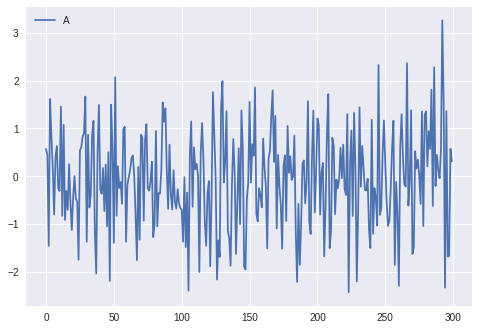

In [41]:
df.plot(x = df.index, y = 'A')

# 常见问题

## values、get_values() 与 array、to_numpy()

这四个值都用来表示容器类型中数据部分，不包含容器中的元数据部分。

* 对于 index 来说，不包含 name 等
* 对于 Series 来说，不包含 index 等
* 对于 DataFrame 来说，不包含 index、columns 等

array 和 to_numpy() 是 **pandas 0.24** 以后引入的，语义更加明确

* 原来的 values，其 dtype 只能包含 numpy 支持的类型，对于 Period/Categorical 这类 pandas 新增类型，其 dtype 通通显示为 object。array 支持所有 pandas 数据类型
* 如果想获得底层的 numpy ndarray，统一使用 to_numpy()
* 对于 DataFrame 来说，to_numpy() 很可能是个昂贵操作


**NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. **When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.


values 和 get_values() 不再推荐使用

In [42]:
!pip show pandas

Name: pandas
Version: 0.22.0
Summary: Powerful data structures for data analysis, time series,and statistics
Home-page: http://pandas.pydata.org
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: pytz, numpy, python-dateutil
Required-by: xarray, vega-datasets, statsmodels, stable-baselines, pymc3, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, magenta, gspread-dataframe, fix-yahoo-finance, featuretools, fbprophet, fastai, cufflinks, altair


In [43]:
idx = pd.period_range('2000', periods=4)
idx.array

AttributeError: ignored

In [44]:
idx.to_numpy()

AttributeError: ignored

# Glossary



## top level

### general data structure

* [Series](http://pandas.pydata.org/pandas-docs/stable/reference/series.html)
* [DataFrame](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html)
* [Index](http://pandas.pydata.org/pandas-docs/stable/reference/indexing.html#index)

### [extended numpy type system](http://pandas.pydata.org/pandas-docs/stable/reference/arrays.html)

* [Timestamp](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html#pandas.Timestamp)
* [Timedelta](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html#pandas.Timedelta)
* [Period](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html#pandas.Period)
* [Interval](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Interval.html#pandas.Interval)
* [Categorical](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html#pandas.Categorical)
